In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
import glob

In [2]:
def read_vx(file, data_str):
    idl_dict = readsav(file)
    vx = idl_dict[data_str]
    return vx

In [3]:
datadir = '/Users/rattie/Data/Ben/SteinSDO/calibration/sanity_check_shifted_images'
lctfile = os.path.join(datadir, 'vxvy-drift-test-0.2step.save')
vx = read_vx(lctfile, 'vxms')
print(vx.shape)

(11, 20)


In [4]:
drifts = np.arange(0.1, 2.1, 0.1)
flct_scales = np.arange(5, 26, 2)
print(flct_scales)

[ 5  7  9 11 13 15 17 19 21 23 25]


<IPython.core.display.Javascript object>


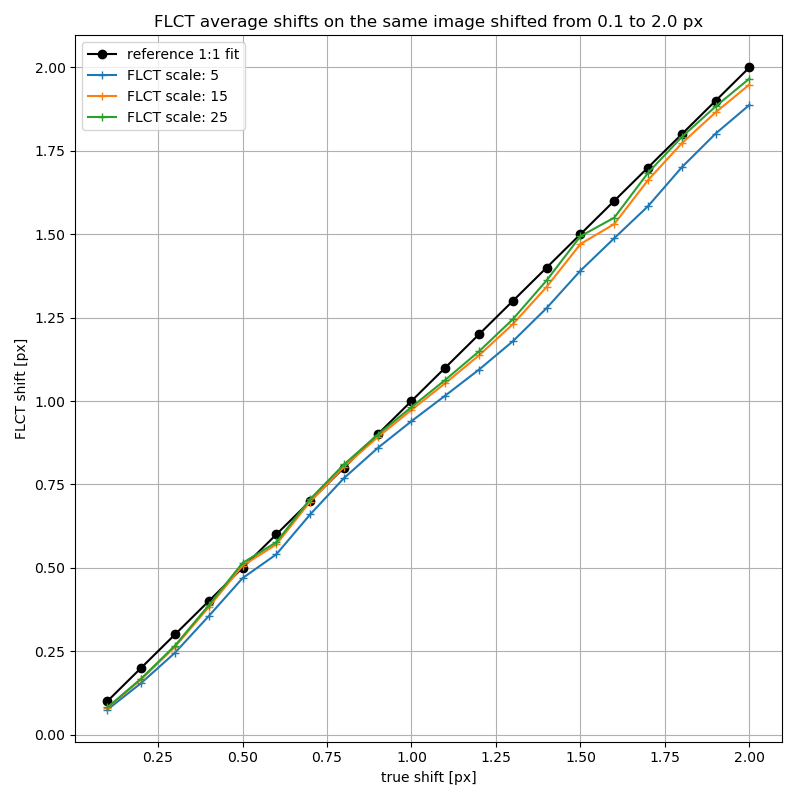

In [5]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.plot(drifts, drifts, 'k-', marker='o', label='reference 1:1 fit')
for i, scale in enumerate(flct_scales[::5]):
    ax.plot(drifts, vx[i,:], marker='+', label = 'FLCT scale: {:d}'.format(scale))
ax.grid(True, axis='both')
plt.xlabel('true shift [px]')
plt.ylabel('FLCT shift [px]')
plt.legend()
plt.title('FLCT average shifts on the same image shifted from 0.1 to 2.0 px')
plt.tight_layout()

In [7]:
lctfiles = sorted(glob.glob(os.path.join(datadir, 'vxvy-drift-test2-*.save')))
dts = [1, 3, 6, 9]
namestr = ['vxmsdt{:d}'.format(dt) for dt in dts]
vxs = [read_vx(file, namestr) for file, namestr in zip(lctfiles, namestr)]
print(vxs[0].shape)

(11, 20)


## Shifts between two different images spaced  by different time gaps,  scale = 15 px

<IPython.core.display.Javascript object>


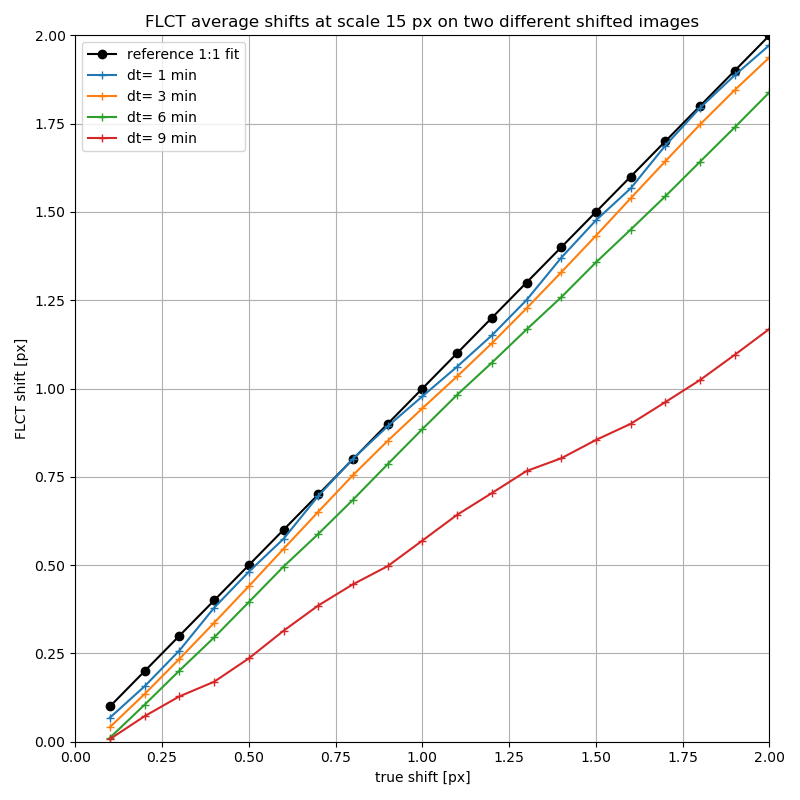

In [31]:
scale_idx = 5
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.plot(drifts, drifts, 'k-', marker='o', label='reference 1:1 fit')
for i, dt in enumerate(dts):
    ax.plot(drifts, vxs[i][scale_idx,:], marker='+', label = 'dt= {:d} min'.format(dt))
ax.grid(True, axis='both')
plt.xlabel('true shift [px]')
plt.ylabel('FLCT shift [px]')
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.legend()
plt.title('FLCT average shifts at scale {:d} px on two different shifted images'.format(flct_scales[scale_idx]))
plt.tight_layout()

### Look at the discrepancies

In [30]:
errors = [[drifts - vx[sidx,:] for sidx in range(len(flct_scales))] for vx in vxs]

In [28]:
len(errors)

4

In [29]:
len(errors[0])

11